In [2]:
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

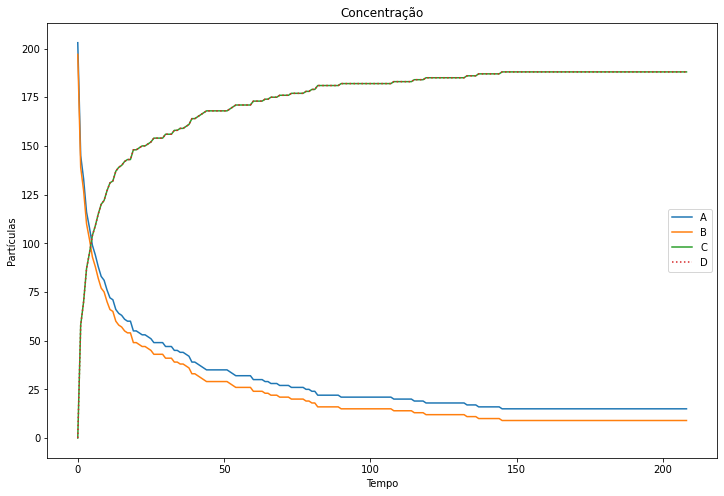

In [3]:
df = pd.read_csv("fefe.csv")

c1x = df["C1"]
c2x = df["C2"]
c3x = df["C3"]
c4x = df["C4"]

fig, ax = plt.subplots(figsize = (12,8))

a1 = ax.plot(c1x, label="A")
a2 = ax.plot(c2x, label="B")
a3 = ax.plot(c3x, label="C")
a4 = ax.plot(c4x, label="D", linestyle = "dotted")
ax.set_xlabel("Tempo")
ax.set_ylabel("Partículas")
ax.set_title("Concentração")
ax.legend()

plt.show(block=False)

In [4]:
# Exponencial
def exp(x, a, b, c):

    return a * np.exp(-b * x) + c

 

# Logarítmo

def log(x, a, b, c):

    return a * np.log(b * x) + c

tempo = []
for i in range (1, ):
    tempo.append(i)
    
tempo.append(358)
    
#print(tempo)

df = pd.DataFrame({"C1": c1x, "C2": c2x, "C3": c3x, "C4": c4x})
#print(df)

c1x = df["C1"]
c2x = df["C2"]
c3x = df["C3"]
c4x = df["C4"]


popt,pcov = curve_fit(exp, tempo, c1x)

popti,pcov = curve_fit(log, tempo ,c3x)

fig3, ax3 = plt.subplots(figsize = (12, 8))

ax3.set_title("Lei da Velocidade")

ax3.plot(tempo, exp(c1x, *popt), ls='--', color='black', label="Curva Ajustada A")

ax3.plot(tempo, log(c3x, *popti), ls='--', color='black', label="Curva Ajustada B")

ax3.grid('- -')

NameError: name 'lastcycle' is not defined

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

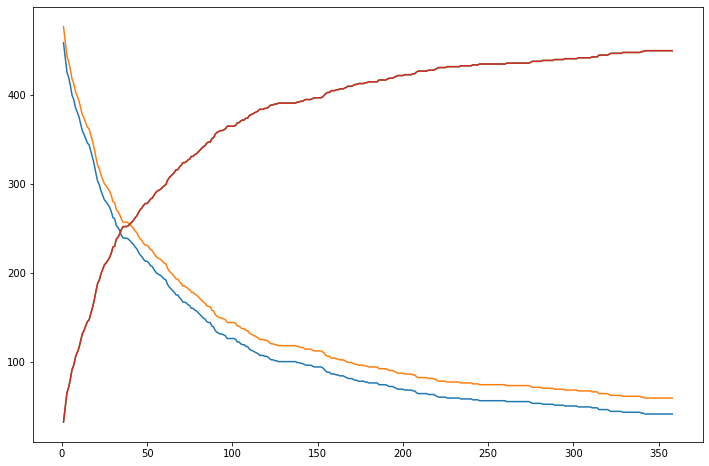

In [7]:
fig, ax4 = plt.subplots(figsize = (12,8))

ax4.plot(tempo, c1, tempo, c2, tempo, c3, tempo, c4)
ax4.plot(tempo, exp(tempo, *popt), tempo, log(tempo, *popt))
legenda = [Line2D([0], [0], label ='A'),
           Line2D([0], [0], label ='B'),
           Line2D([0], [0], label ='C'),
           Line2D([0], [0], linestyle = '--', label ='D')]
# ax4.plot(tempo, c2 label="B")
# ax4.plot(tempo, c3, label="C")
# ax4.plot(tempo, c4, label="D", linestyle = "dotted")
ax4.set_xlabel("Tempo")
ax4.set_ylabel("Partículas")
ax4.set_title("Concentração")
ax4.legend(handles=legenda)

plt.show()